In [1]:
import os
import time
import psutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from threading import Thread, Event

In [2]:
class MemoryMonitor(Thread):

    def __init__(self, interval):
        Thread.__init__(self)
        self.daemon = True
        self.interval = interval
        self.process = psutil.Process(os.getpid())
        self.buffer = []
        self.stopped = Event()

    def monitor(self):
        self.buffer.append((time.time(), self.process.memory_info().rss))
        
    def run(self):
        while not self.stopped.wait(self.interval):
            self.monitor()

    def stop(self):
        self.stopped.set()

In [3]:
GB = 1024**3/8
SIZE = int(np.sqrt(1.0*GB))

Text(0.5, 1.0, 'Peak=4381237248.0\nElapsed=40.77805733680725')

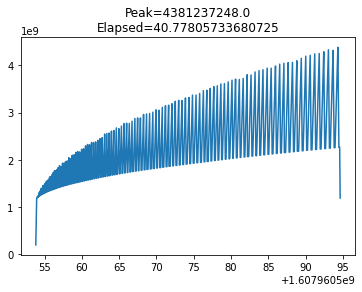

In [4]:
def malloc():
    data = np.ones((SIZE, SIZE))
    df = pd.DataFrame()
    for j in range(data.shape[1]):
        df['MyCol_{}'.format(j)] = data[:, j]
    return df

monitor = MemoryMonitor(0.01)
monitor.start()
df = malloc()
monitor.stop()
time.sleep(1)

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))

Text(0.5, 1.0, 'Peak=2168594432.0\nElapsed=0.17860198020935059')

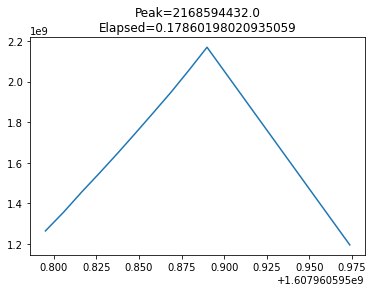

In [5]:
def malloc():
    data = np.ones((SIZE, SIZE))
    df = pd.DataFrame(data=data, columns=['MyCol_{}'.format(j) for j in range(data.shape[1])])
    return df

monitor = MemoryMonitor(0.01)
monitor.start()
malloc()
monitor.stop()
time.sleep(1)

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))

Text(0.5, 1.0, 'Peak=2269540352.0\nElapsed=0.059159040451049805')

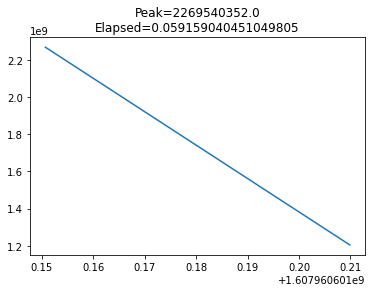

In [6]:
def malloc():
    df = pd.DataFrame(data=np.array([[float(1.0)]*SIZE]*SIZE), columns=['MyCol_{}'.format(j) for j in range(SIZE)])
    return df

monitor = MemoryMonitor(0.01)
monitor.start()
df = malloc()
monitor.stop()
time.sleep(1)

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))

Text(0.5, 1.0, 'Peak=3351535616.0\nElapsed=14.656567811965942')

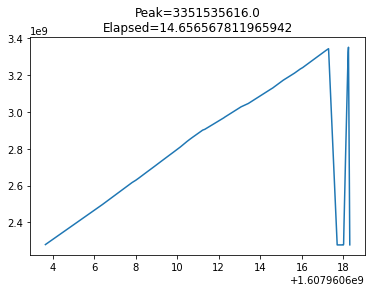

In [7]:
def malloc():
    data = [[float(1.0)]*SIZE]*SIZE
    df = pd.DataFrame(data=data, columns=['MyCol_{}'.format(j) for j in range(len(data[0]))])
    return df

monitor = MemoryMonitor(0.01)
monitor.start()
df = malloc()
monitor.stop()
time.sleep(1)

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))

Text(0.5, 1.0, 'Peak=9867681792.0\nElapsed=54.842002153396606')

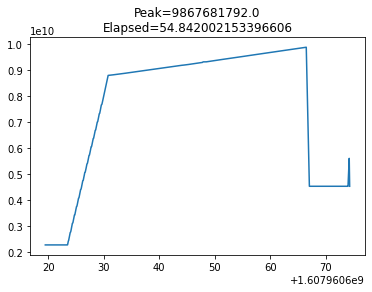

In [8]:
def malloc():
    data = [[float(1.0)]*SIZE]*SIZE
    df = pd.DataFrame(data=[np.array(x) for x in data], columns=['MyCol_{}'.format(j) for j in range(len(data[0]))])
    return df

monitor = MemoryMonitor(0.01)
monitor.start()
df = malloc()
monitor.stop()
time.sleep(1)

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))

Text(0.5, 1.0, 'Peak=6582452224.0\nElapsed=41.139678955078125')

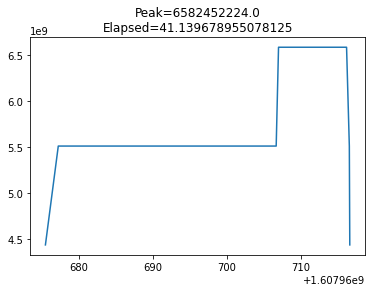

In [9]:
def malloc():
    data = [[float(1.0)]*SIZE]*SIZE
    df = pd.DataFrame({'MyCol_{}'.format(i): x} for i, x in enumerate(data))
    return df

monitor = MemoryMonitor(0.01)
monitor.start()
df = malloc()
monitor.stop()
time.sleep(1)

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))

Text(0.5, 1.0, 'Peak=6581682176.0\nElapsed=40.2304801940918')

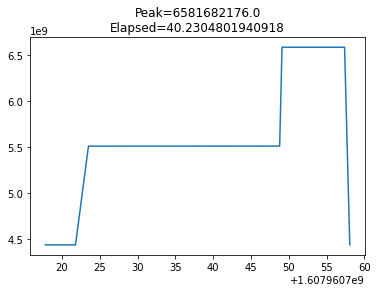

In [10]:
def malloc():
    data = [[float(1.0)]*SIZE]*SIZE
    df = pd.DataFrame({'MyCol_{}'.format(i): np.array(x)} for i, x in enumerate(data))
    return df

monitor = MemoryMonitor(0.01)
monitor.start()
df = malloc()
monitor.stop()
time.sleep(1)

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))

Text(0.5, 1.0, 'Peak=4434231296.0\nElapsed=0.0')

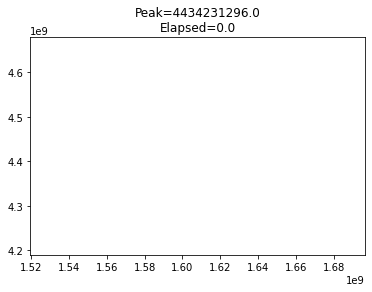

In [11]:
def malloc():
    data = [[float(1.0)]*SIZE]*SIZE
    data = np.array(data)
    df = pd.DataFrame(data=data, columns=['MyCol_{}'.format(j) for j in range(data.shape[1])])
    return df

monitor = MemoryMonitor(0.01)
monitor.start()
df = malloc()
monitor.stop()
time.sleep(1)

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))

Text(0.5, 1.0, 'Peak=5507833856.0\nElapsed=4.321505546569824')

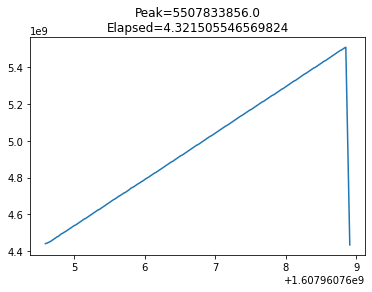

In [12]:
def malloc():
    data = np.empty((SIZE, SIZE))
    for i in range(data.shape[0]):
        data[i, :] = [float(1.0)]*SIZE
    df = pd.DataFrame(data=data, columns=['MyCol_{}'.format(j) for j in range(data.shape[1])])
    return df

monitor = MemoryMonitor(0.01)
monitor.start()
df = malloc()
monitor.stop()
time.sleep(1)

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))